In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [171]:
def make_plot(abr):
    f = open(abr + "_result.json")
    data = json.load(f)
    
    std_y_axis =[]
    avg_bandwidth_x_axis = []
    bufflen_arr = []
    color_scheme = [[255, 255, 255], [255, 200, 200], [247, 150, 150], [252, 0, 0], [128, 0, 128]]
    
    for trace in data.keys():
        datum = data[trace]
        std_y_axis.append(int(datum["std_bandwidth"]))
        avg_bandwidth_x_axis.append(int(datum["average_bandwidth"]))
        bufflen_arr.append(int(datum["bufflen"]))
    
    plot_colors = []
    for bufflen in bufflen_arr:
        plot_colors.append(color_scheme[(bufflen//2) - 1])
    
    plot_colors = np.array(plot_colors)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='6s', markerfacecolor=(247/255.0, 150/255.0, 150/255.0), markersize=8),
                      Line2D([0], [0], marker='o', color='w', label='8s', markerfacecolor=(252/255.0, 0/255.0, 0/255.0), markersize=8),
                      Line2D([0], [0], marker='o', color='w', label='10s', markerfacecolor=(128/255.0, 0/255.0, 128/255.0), markersize=8)]
    
    plt.xlabel("Average bandwidth (bps)")
    plt.ylabel("Standard deviation in bandwidth (bps)")
    plt.title(abr.upper())
    plt.scatter(avg_bandwidth_x_axis, std_y_axis, s = 50, c = plot_colors/255.0)
    plt.legend(handles=legend_elements, bbox_to_anchor=(1, 0.5), title="Buffer Length")

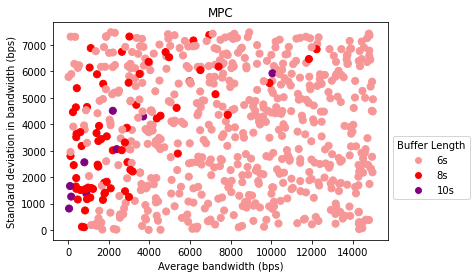

In [175]:
make_plot("mpc")

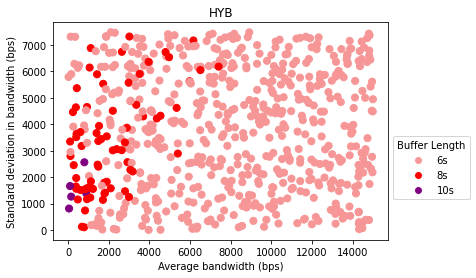

In [176]:
make_plot("hyb")

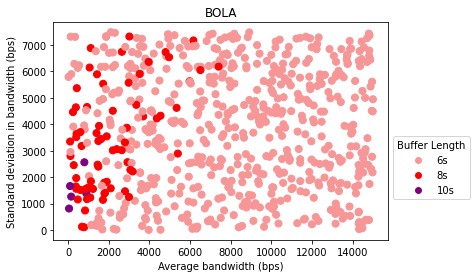

In [177]:
make_plot("bola")

In [27]:
def make_plot(abr, buf_len):
    f = open(abr + "_result.json")
    data = json.load(f)
    
    std_y_axis =[]
    avg_bandwidth_x_axis = []
    bufflen_arr = []
    
    for trace in data.keys():
        datum = data[trace]
        
        if buf_len < datum["bufflen"]:
            std_y_axis.append(int(datum["std_bandwidth"]))
            avg_bandwidth_x_axis.append(int(datum["average_bandwidth"]))
            bufflen_arr.append(int(datum["bufflen"]))
    
    plt.xlabel("Average bandwidth (kbps)")
    plt.ylabel("Standard deviation in bandwidth (kbps)")
    plt.title("Sessions with rebuffering for ABR " + abr.upper() + " and buffer length " + str(buf_len) + "s")
    plt.scatter(avg_bandwidth_x_axis, std_y_axis)

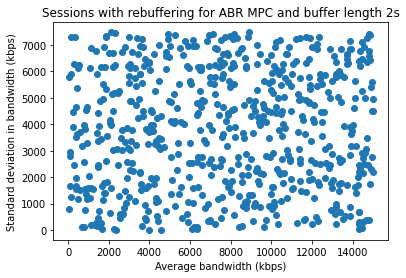

In [28]:
make_plot("mpc", 2)

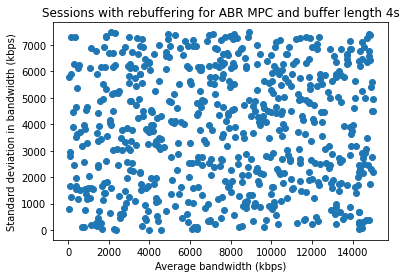

In [29]:
make_plot("mpc", 4)

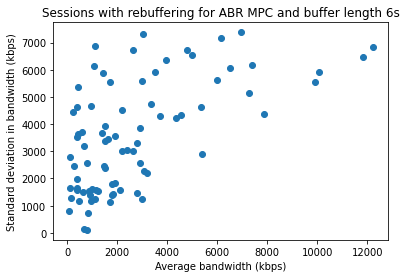

In [30]:
make_plot("mpc", 6)

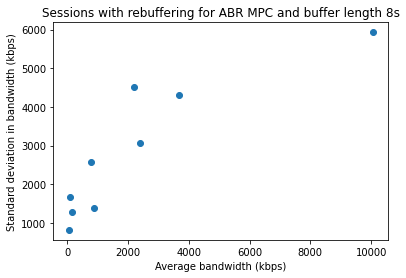

In [31]:
make_plot("mpc", 8)

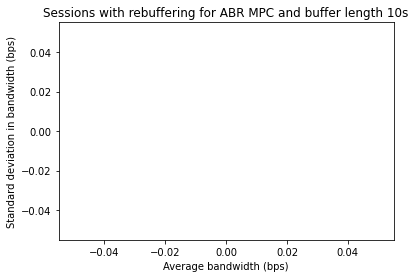

In [26]:
make_plot("mpc", 10)